In [93]:
import numpy as np

# 目标函数
def target_function(x):
    return np.sin(2 * np.pi * x) + 0.5 * x

# 生成数据
def generate_data(n_samples=100):
    x = np.linspace(-1, 1, n_samples).reshape(-1, 1)
    y = target_function(x)
    return x, y

In [94]:
# 初始化神经网络参数
def init_weights(input_dim, hidden_dim, output_dim):
    W1 = np.random.randn(input_dim, hidden_dim) * np.sqrt(2 / input_dim)
    b1 = np.zeros((1, hidden_dim))
    W2 = np.random.randn(hidden_dim, output_dim) * np.sqrt(2 / input_dim)
    b2 = np.zeros((1, output_dim))
    return W1, b1, W2, b2

# ReLU 激活函数
def relu(x):
    return np.maximum(0, x)

# 训练神经网络
def train(x_train, y_train, hidden_dim=250, lr=0.01, epochs=10000):
    input_dim = x_train.shape[1]
    output_dim = y_train.shape[1]
    W1, b1, W2, b2 = init_weights(input_dim, hidden_dim, output_dim)
    
    for epoch in range(epochs):
        # 前向传播
        z1 = x_train @ W1 + b1
        a1 = relu(z1)
        z2 = a1 @ W2 + b2
        y_pred = z2  # 输出层是线性激活
        
        # 计算损失
        loss = np.mean((y_pred - y_train) ** 2)
        
        # 反向传播
        dL_dy = 2 * (y_pred - y_train) / len(y_train)
        dL_dW2 = a1.T @ dL_dy
        dL_db2 = np.sum(dL_dy, axis=0, keepdims=True)
        dL_da1 = dL_dy @ W2.T
        dL_dz1 = dL_da1 * (z1 > 0)  # ReLU 梯度
        dL_dW1 = x_train.T @ dL_dz1
        dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)
        
        # 更新参数
        W1 -= lr * dL_dW1
        b1 -= lr * dL_db1
        W2 -= lr * dL_dW2
        b2 -= lr * dL_db2
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.5f}")
    
    return W1, b1, W2, b2

# 预测函数
def predict(x, W1, b1, W2, b2):
    z1 = x @ W1 + b1
    a1 = relu(z1)
    z2 = a1 @ W2 + b2
    return z2

In [95]:
# 训练和测试
x_train, y_train = generate_data(500)
x_test, y_test = generate_data(50)
W1, b1, W2, b2 = train(x_train, y_train)
y_pred = predict(x_test, W1, b1, W2, b2)

Epoch 0, Loss: 14.13775
Epoch 100, Loss: 0.13644
Epoch 200, Loss: 0.09340
Epoch 300, Loss: 0.07243
Epoch 400, Loss: 0.05940
Epoch 500, Loss: 0.04983
Epoch 600, Loss: 0.04228
Epoch 700, Loss: 0.03616
Epoch 800, Loss: 0.03112
Epoch 900, Loss: 0.02695
Epoch 1000, Loss: 0.02350
Epoch 1100, Loss: 0.02065
Epoch 1200, Loss: 0.01828
Epoch 1300, Loss: 0.01630
Epoch 1400, Loss: 0.01467
Epoch 1500, Loss: 0.01332
Epoch 1600, Loss: 0.01220
Epoch 1700, Loss: 0.01128
Epoch 1800, Loss: 0.01053
Epoch 1900, Loss: 0.00989
Epoch 2000, Loss: 0.00934
Epoch 2100, Loss: 0.00885
Epoch 2200, Loss: 0.00843
Epoch 2300, Loss: 0.00804
Epoch 2400, Loss: 0.00769
Epoch 2500, Loss: 0.00737
Epoch 2600, Loss: 0.00708
Epoch 2700, Loss: 0.00680
Epoch 2800, Loss: 0.00655
Epoch 2900, Loss: 0.00631
Epoch 3000, Loss: 0.00608
Epoch 3100, Loss: 0.00587
Epoch 3200, Loss: 0.00568
Epoch 3300, Loss: 0.00549
Epoch 3400, Loss: 0.00531
Epoch 3500, Loss: 0.00515
Epoch 3600, Loss: 0.00499
Epoch 3700, Loss: 0.00484
Epoch 3800, Loss: 0.004

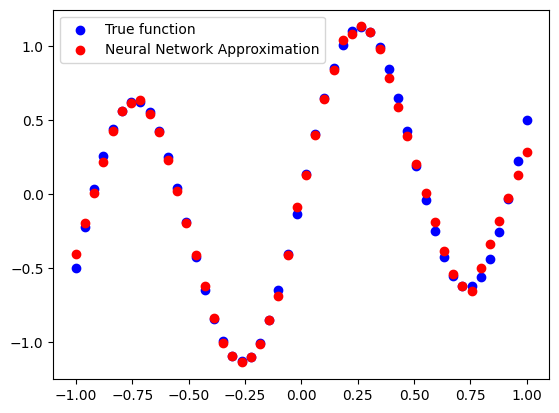

In [96]:
import matplotlib.pyplot as plt
# 画出结果
plt.scatter(x_test, y_test, label="True function", color="blue")
plt.scatter(x_test, y_pred, label="Neural Network Approximation", color="red")
plt.legend()
plt.show()